In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

%matplotlib inline

In [2]:
print(os.listdir("../working"))

['__notebook__.ipynb']


In [3]:
train_data = pd.read_csv("../input/quora-data/quora_train_test/quora_train.csv")

In [4]:
test_data = pd.read_csv("../input/quora-data/quora_train_test/quora_test.csv")

In [5]:
tt = pd.read_csv("../input/quora-data/quora_train_test/quora_test.csv")
print(tt.shape)

(80871, 7)


In [6]:
tt["question1"].isnull().sum()

0

In [7]:
tt["question2"].isnull().sum()

1

In [8]:
train_data.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
0,195840,195840,386541,386542,How does banning 500 & 1000 rupee notes solve ...,Will the ban on 500 & 1000 rupee notes really ...,1
1,252241,252241,496583,496584,What is the hardest thing(s) about raising chi...,What is the hardest thing(s) about raising chi...,0
2,249224,249224,490718,490719,Who are Utopia's top competitors?,Who are Axis 41's top competitors?,0
3,125536,125536,248723,248724,I want to improve my reading skill by reading ...,How can reading newspaper help me improve my E...,0
4,390237,390237,762803,762804,How do I gain weight in naturally way?,How to gain weight ?,1


In [9]:
train_data.shape

(323480, 7)

In [10]:
test_data.shape

(80871, 7)

In [11]:
test_data.fillna(value = " ",inplace = True)
train_data.fillna(value = " ",inplace = True)

In [12]:
test_data[['question1','question2']].isnull().sum()

question1    0
question2    0
dtype: int64

In [13]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
def striphtml(data): 
    cleanr = re.compile('<.*?>') 
    cleantext = re.sub(cleanr, ' ', str(data)) 
    return cleantext   

In [15]:
def stripunc(data): 
    return re.sub('[^A-Za-z]+', ' ', str(data), flags=re.MULTILINE|re.DOTALL) 

In [16]:
x = "Hello, World! <how are you?>"

In [17]:
stripunc(x)

'Hello World how are you '

In [18]:
striphtml(x)

'Hello, World!  '

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english')) 
stemmer = SnowballStemmer("english") 

from tqdm import tqdm

In [20]:
def compute(sent): 
    
    sent = decontracted(sent) 
    sent = striphtml(sent) 
    sent = stripunc(sent) 
    
    words=word_tokenize(str(sent.lower())) 
    
    #Removing all single letter and and stopwords from question 
    sent1=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1)) 
    sent2=' '.join(str(j) for j in words if j not in stop_words and (len(j)!=1)) 
    return sent1, sent2   

In [21]:
clean_stemmed_q1 = []
clean_stemmed_q2 = []
clean_q1 = []
clean_q2 = []
combined_stemmed_text = []
for _, row in tqdm(train_data.iterrows()):
    csq1, cq1 = compute(row['question1'])
    csq2, cq2 = compute(row['question2'])
    clean_stemmed_q1.append(csq1)
    clean_q1.append(cq1)
    clean_stemmed_q2.append(csq2)
    clean_q2.append(cq2)
    combined_stemmed_text.append(csq1+" "+csq2)

323480it [05:21, 1007.21it/s]


In [22]:
clean_stemmed_q1_t = []
clean_stemmed_q2_t = []
clean_q1_t = []
clean_q2_t = []
combined_stemmed_text_t = []
for _, row in tqdm(test_data.iterrows()):
    
    csq1_t, cq1_t = compute(row['question1'])
    csq2_t, cq2_t = compute(row['question2'])
    clean_stemmed_q1_t.append(csq1_t)
    clean_q1_t.append(cq1_t)
    clean_stemmed_q2_t.append(csq2_t)
    clean_q2_t.append(cq2_t)
    combined_stemmed_text_t.append(csq1_t+" "+csq2_t)

80871it [01:20, 1009.86it/s]


In [23]:
test_data["question1"][test_data["question2"].isnull()]

Series([], Name: question1, dtype: object)

In [24]:
test_data["question2"][test_data["question1"].isnull()]

Series([], Name: question2, dtype: object)

In [25]:
print(len(clean_stemmed_q1))
print(len(clean_stemmed_q2))
print(len(clean_q1))
print(len(clean_q2))
print(len(combined_stemmed_text))

323480
323480
323480
323480
323480


In [26]:
train_data.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
0,195840,195840,386541,386542,How does banning 500 & 1000 rupee notes solve ...,Will the ban on 500 & 1000 rupee notes really ...,1
1,252241,252241,496583,496584,What is the hardest thing(s) about raising chi...,What is the hardest thing(s) about raising chi...,0
2,249224,249224,490718,490719,Who are Utopia's top competitors?,Who are Axis 41's top competitors?,0
3,125536,125536,248723,248724,I want to improve my reading skill by reading ...,How can reading newspaper help me improve my E...,0
4,390237,390237,762803,762804,How do I gain weight in naturally way?,How to gain weight ?,1


In [27]:
train_data['clean_stemmed_q1'] = clean_stemmed_q1
train_data['clean_stemmed_q2'] = clean_stemmed_q2
train_data['clean_q1'] = clean_q1
train_data['clean_q2'] = clean_q2
train_data['combined_stemmed_text'] = combined_stemmed_text

In [28]:
test_data['clean_stemmed_q1_t'] = clean_stemmed_q1_t
test_data['clean_stemmed_q2_t'] = clean_stemmed_q2_t
test_data['clean_q1_t'] = clean_q1_t
test_data['clean_q2_t'] = clean_q2_t
test_data['combined_stemmed_text_t'] = combined_stemmed_text_t

In [29]:
train_data.tail()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,clean_stemmed_q1,clean_stemmed_q2,clean_q1,clean_q2,combined_stemmed_text
323475,182164,182164,359776,359777,"Who will win, Trump or Clinton?","Who will be indicted first, Trump or Clinton?",0,win trump clinton,indict first trump clinton,win trump clinton,indicted first trump clinton,win trump clinton indict first trump clinton
323476,280219,280219,550879,550880,Which is the best earphone under 1000rs?,What is the best earphone under 1000 rs?,1,best earphon rs,best earphon rs,best earphone rs,best earphone rs,best earphon rs best earphon rs
323477,56173,56173,111758,111759,What songs make you cry and why?,Which songs did make you cry ever?,1,song make cri,song make cri ever,songs make cry,songs make cry ever,song make cri song make cri ever
323478,231498,231498,456152,456153,Taste of sperm?,What is the taste of sperm?,1,tast sperm,tast sperm,taste sperm,taste sperm,tast sperm tast sperm
323479,208672,208672,411633,411634,How do I become mentally strong?,How can one become emotionally and mentally st...,1,becom mental strong,one becom emot mental strong life,become mentally strong,one become emotionally mentally strong life,becom mental strong one becom emot mental stro...


In [30]:
test_data.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,clean_stemmed_q1_t,clean_stemmed_q2_t,clean_q1_t,clean_q2_t,combined_stemmed_text_t
0,384611,384611,752053,752054,What are the pros and cons of Legalzoom-genera...,Where can I read reviews of LegalZoom?,0,pros con legalzoom generat will,read review legalzoom,pros cons legalzoom generated wills,read reviews legalzoom,pros con legalzoom generat will read review le...
1,258398,258398,508576,508577,Why does ready-to-eat poha absorb water instan...,Ultimate teen patti hacker?,0,readi eat poha absorb water instant,ultim teen patti hacker,ready eat poha absorb water instantly,ultimate teen patti hacker,readi eat poha absorb water instant ultim teen...
2,234932,234932,462847,462848,How apps like paytm earn profit when they are ...,How does Paytm earn by giving extra cash back ...,1,app like paytm earn profit give mani cash back...,paytm earn give extra cash back alreadi discou...,apps like paytm earn profit giving many cash b...,paytm earn giving extra cash back already disc...,app like paytm earn profit give mani cash back...
3,347622,347622,681123,681124,What daily habits can greatly upgrade life?,What are your daily habits that improve your p...,1,daili habit great upgrad life,daili habit improv product creativ,daily habits greatly upgrade life,daily habits improve productivity creativity,daili habit great upgrad life daili habit impr...
4,388186,388186,758881,758882,What video game world would you want to live in?,"If you could live in any video game setting, w...",1,video game world would want live,could live video game set would live,video game world would want live,could live video game setting would live,video game world would want live could live vi...


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_val, y_train, y_val = train_test_split(train_data[['clean_q1', 'clean_q2']], train_data['is_duplicate'], test_size=0.1, random_state=42)

In [33]:
test_data = test_data.rename(columns = {'clean_q1_t':'clean_q1','clean_q2_t':'clean_q2'})

X_test = test_data[['clean_q1', 'clean_q2']]
y_test = test_data['is_duplicate']

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(291132, 2)
(291132,)
(32348, 2)
(32348,)
(80871, 2)
(80871,)


In [35]:
X_train.head()

,clean_q1,clean_q2
236722,various ways one earn money online,earn money easily online
268587,pan card,get pan card
232326,rahul gandhi better politician arvind kejriwal,better politician narendra modi rahul gandhi a...
242871,teach english,best way teach english students
156901,psychopath sociopath,qualities psychopath sociopath tell differences


In [36]:
X_train['text'] = X_train[['clean_q1','clean_q2']].apply(lambda x:str(x[0])+" "+str(x[1]), axis=1)

In [37]:
import tensorflow as tf

In [38]:
import keras
import keras.backend as K

In [39]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Concatenate, Conv2D, Flatten, Dense, Embedding, LSTM
from keras.models import Model

In [40]:
t = Tokenizer()
t.fit_on_texts(X_train['text'].values)

In [41]:
X_train['clean_q1'] = X_train['clean_q1'].astype(str)
X_train['clean_q2'] = X_train['clean_q2'].astype(str)

In [42]:
X_val['clean_q1'] = X_val['clean_q1'].astype(str)
X_val['clean_q2'] = X_val['clean_q2'].astype(str)

X_test['clean_q1'] = X_test['clean_q1'].astype(str)
X_test['clean_q2'] = X_test['clean_q2'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [43]:
train_q1_seq = t.texts_to_sequences(X_train['clean_q1'].values)

In [44]:
train_q2_seq = t.texts_to_sequences(X_train['clean_q2'].values)
val_q1_seq = t.texts_to_sequences(X_val['clean_q1'].values)
val_q2_seq = t.texts_to_sequences(X_val['clean_q2'].values)
test_q1_seq = t.texts_to_sequences(X_test['clean_q1'].values)
test_q2_seq = t.texts_to_sequences(X_test['clean_q2'].values)

In [45]:
len_vec = [len(sent_vec) for sent_vec in train_q1_seq]

In [46]:
np.max(len_vec)

43

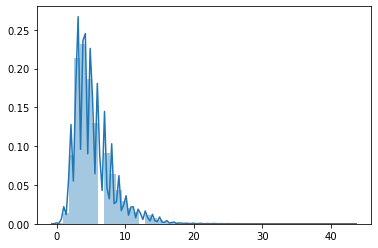

In [47]:
sns.distplot(len_vec)

In [48]:
len_vec = [len(sent_vec) for sent_vec in train_q2_seq]

In [49]:
np.max(len_vec)

97

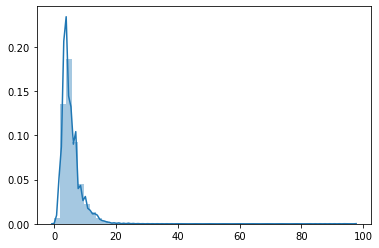

In [50]:
sns.distplot(len_vec)

In [51]:
max_len = 30

In [52]:
train_q1_seq = pad_sequences(train_q1_seq, maxlen=max_len, padding='post')

In [53]:
train_q2_seq = pad_sequences(train_q2_seq, maxlen=max_len, padding='post')
val_q1_seq = pad_sequences(val_q1_seq, maxlen=max_len, padding='post')
val_q2_seq = pad_sequences(val_q2_seq, maxlen=max_len, padding='post')
test_q1_seq = pad_sequences(test_q1_seq, maxlen=max_len, padding='post')
test_q2_seq = pad_sequences(test_q2_seq, maxlen=max_len, padding='post')

In [54]:
print(len(train_q1_seq[0]))
print(len(train_q2_seq[0]))
print(len(val_q1_seq[0]))
print(len(val_q2_seq[0]))
print(len(test_q1_seq[0]))
print(len(test_q1_seq[0]))

30
30
30
30
30
30


In [55]:
import joblib

In [56]:
#https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
embeddings_index = {}
f = open('../input/glove6b50dtxt/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [57]:
len(embeddings_index.keys())

400000

In [58]:
len(embeddings_index['apple'])

50

In [59]:
not_present_list = []
vocab_size = len(t.word_index) + 1
print('Loaded %s word vectors.' % len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, len(embeddings_index['no'])))
for word, i in t.word_index.items():
    if word in embeddings_index.keys():
        embedding_vector = embeddings_index.get(word)
    else:
        not_present_list.append(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.zeros(300)


Loaded 400000 word vectors.


In [60]:
embedding_matrix.shape

(68951, 50)

In [61]:
len(t.word_index) 

68950

In [62]:
#not_present_list

In [63]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.layers import Input, Dense, Flatten, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract, Add, Conv2D

In [64]:
from keras import backend as K

def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)

In [65]:
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)


In [66]:
input_1 = Input(shape=(train_q1_seq.shape[1],))
input_2 = Input(shape=(train_q2_seq.shape[1],))


common_embed = Embedding(name="synopsis_embedd",input_dim =len(t.word_index)+1, 
                       output_dim=len(embeddings_index['no']),weights=[embedding_matrix], 
                       input_length=train_q1_seq.shape[1],trainable=True) 
lstm_1 = common_embed(input_1)
lstm_2 = common_embed(input_2)


common_lstm = LSTM(64,return_sequences=True, activation="relu")
common_lstm_2 = LSTM(64,return_sequences=True, activation="relu")
vector_1 = common_lstm(lstm_1)
vector_1 = common_lstm_2(vector_1)
vector_1 = Flatten()(vector_1)

vector_2 = common_lstm(lstm_2)
vector_2 = common_lstm_2(vector_2)
vector_2 = Flatten()(vector_2)

x3 = Subtract()([vector_1, vector_2])
x3 = Multiply()([x3, x3])

x1_ = Multiply()([vector_1, vector_1])
x2_ = Multiply()([vector_2, vector_2])
x4 = Subtract()([x1_, x2_])
    
    #https://stackoverflow.com/a/51003359/10650182
x5 = Lambda(cosine_distance, output_shape=cos_dist_output_shape)([vector_1, vector_2])
    
conc = Concatenate(axis=-1)([x5,x4, x3])

x = Dense(100, activation="relu", name='conc_layer')(conc)
x = Dropout(0.01)(x)
x = Dense(100, activation="relu", name='dense_layer')(x)
x = Dropout(0.01)(x)
out = Dense(1, activation="sigmoid", name = 'out')(x)

model = Model([input_1, input_2], out)

model.compile(loss="binary_crossentropy", metrics=['acc','AUC'], optimizer=Adam(0.0001))

In [67]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
synopsis_embedd (Embedding)     (None, 30, 50)       3447550     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 30, 64)       29440       synopsis_embedd[0][0]        

In [68]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='../working/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [69]:
model.fit([train_q1_seq,train_q2_seq],y_train.values.reshape(-1,1), epochs = 10,
          batch_size=64,validation_data=([val_q1_seq, val_q2_seq],y_val.values.reshape(-1,1)), callbacks=my_callbacks)

Epoch 1/10
4549/4549 [==============================] - 1075s 236ms/step - loss: 0.5401 - acc: 0.7048 - auc: 0.7729 - val_loss: 0.5092 - val_acc: 0.7323 - val_auc: 0.8042
Epoch 2/10
4549/4549 [==============================] - 1074s 236ms/step - loss: 0.4807 - acc: 0.7555 - auc: 0.8296 - val_loss: 0.4822 - val_acc: 0.7560 - val_auc: 0.8297
Epoch 3/10
4549/4549 [==============================] - 1022s 225ms/step - loss: 0.4481 - acc: 0.7796 - auc: 0.8549 - val_loss: 0.4617 - val_acc: 0.7712 - val_auc: 0.8473
Epoch 4/10
4549/4549 [==============================] - 981s 216ms/step - loss: 0.3691 - acc: 0.8303 - auc: 0.9063 - val_loss: 0.4335 - val_acc: 0.7947 - val_auc: 0.8718
Epoch 8/10
4549/4549 [==============================] - 977s 215ms/step - loss: 0.3250 - acc: 0.8539 - auc: 0.9272 - val_loss: 0.4287 - val_acc: 0.8053 - val_auc: 0.8795
